In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
survey_df = pd.read_csv('Stack Overflow Survey Responses (Modified).csv')
survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [ ]:
numeric_df = survey_df.select_dtypes(include=[int, float])
numeric_df.head()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
0,NaN,NaN,21,13
1,70841.0,7.0,38,9
2,NaN,8.0,45,11
3,21426.0,NaN,46,12
4,41671.0,8.0,39,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc49bf3f250>,
      dtype=object)

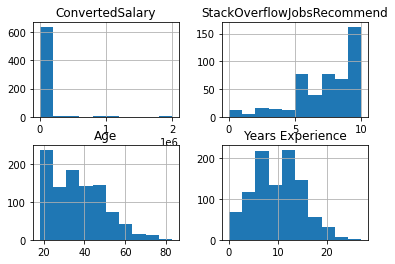

In [ ]:
numeric_df.hist()

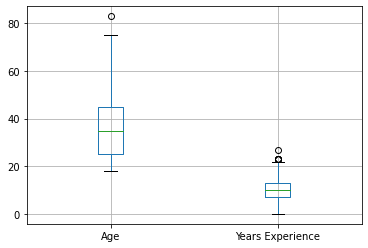

In [ ]:
numeric_df[['Age', 'Years Experience']].boxplot()

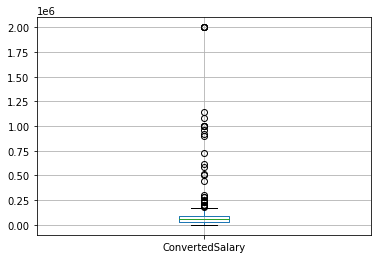

In [ ]:
numeric_df[['ConvertedSalary']].boxplot()

In [ ]:
numeric_df['ConvertedSalary'].fillna(numeric_df['ConvertedSalary'].median(), inplace=True)
numeric_df['ConvertedSalary'] = round(numeric_df['ConvertedSalary'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(min(numeric_df['ConvertedSalary']))

0.0


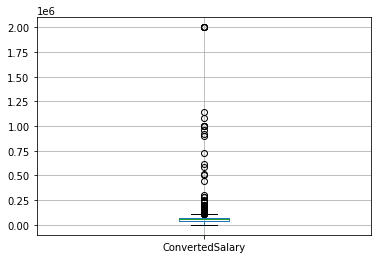

In [ ]:
numeric_df[['ConvertedSalary']].boxplot()

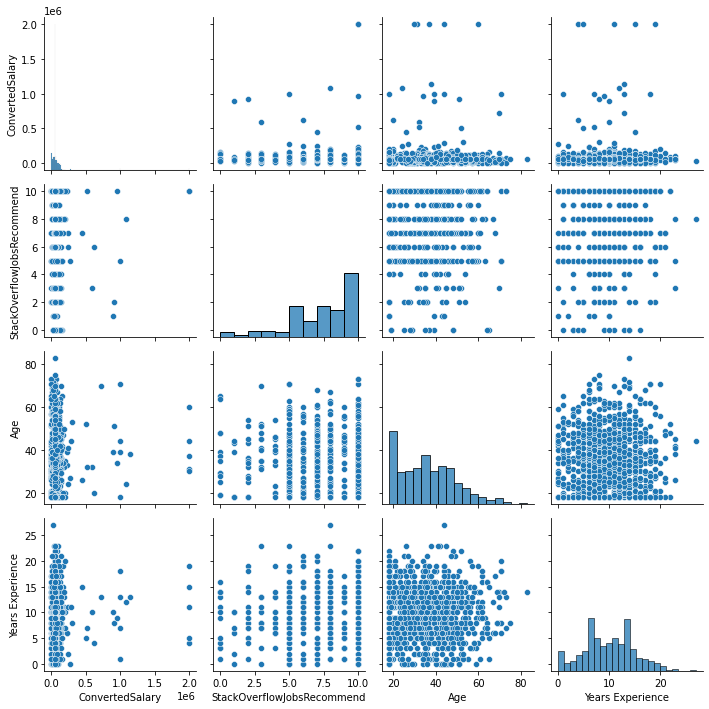

In [ ]:
sns.pairplot(numeric_df)

In [ ]:
numeric_df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
count,9.990000e+02,487.000000,999.000000,999.000000
mean,8.019374e+04,7.061602,36.003003,9.961962
std,1.714781e+05,2.621591,13.255127,4.878129
min,0.000000e+00,0.000000,18.000000,0.000000
25%,4.164150e+04,5.000000,25.000000,7.000000
50%,5.556200e+04,7.000000,35.000000,10.000000
75%,7.000000e+04,10.000000,45.000000,13.000000
max,2.000000e+06,10.000000,83.000000,27.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()

m_scaler.fit(numeric_df[['Age']])

numeric_df['Age_MM'] = m_scaler.transform(numeric_df[['Age']])

print(numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

s_scaler.fit(numeric_df[['Age']])

numeric_df['Age_SS'] = s_scaler.transform(numeric_df[['Age']])

print(numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4912f2050>,
      dtype=object)

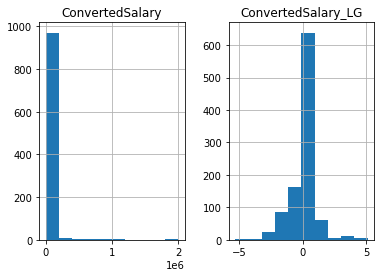

In [ ]:
from sklearn.preprocessing import PowerTransformer

pow_trans = PowerTransformer()

pow_trans.fit(numeric_df[['ConvertedSalary']])

numeric_df['ConvertedSalary_LG'] = pow_trans.transform(numeric_df[['ConvertedSalary']])

numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc489998410>]],
      dtype=object)

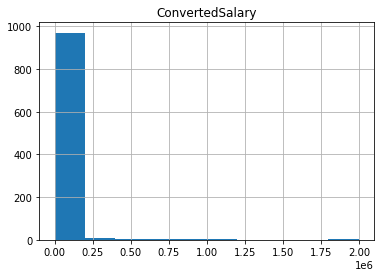

In [ ]:
quantile = numeric_df['ConvertedSalary'].quantile(0.95)

trimmed_df = numeric_df[numeric_df['ConvertedSalary'] < quantile]

numeric_df[['ConvertedSalary']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4899406d0>]],
      dtype=object)

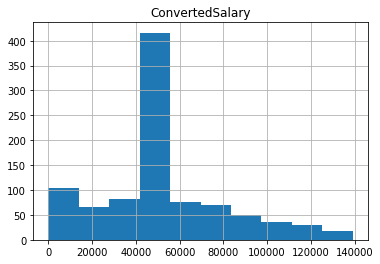

In [ ]:
trimmed_df[['ConvertedSalary']].hist()

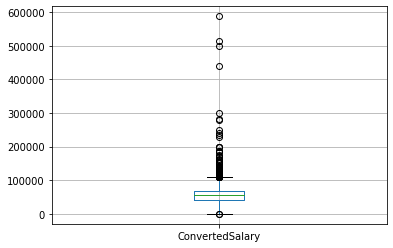

In [ ]:
std = numeric_df['ConvertedSalary'].std()
mean = numeric_df['ConvertedSalary'].mean()

cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

trimmed_df1 = numeric_df[(numeric_df['ConvertedSalary'] < upper) 
                        & (numeric_df['ConvertedSalary'] > lower)]

trimmed_df1[['ConvertedSalary']].boxplot()

In [ ]:
speech_df = pd.read_csv('US Presidential Inauguration Addresses.csv')
speech_df.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


In [ ]:
print(speech_df['text'].head())

0    Fellow-Citizens of the Senate and of the House...
1    Fellow Citizens:  I AM again called upon by th...
2    WHEN it was first perceived, in early times, t...
3    Friends and Fellow-Citizens:  CALLED upon to u...
4    PROCEEDING, fellow-citizens, to that qualifica...
Name: text, dtype: object


In [ ]:
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df= 0.2, max_df= 0.8)

cv.fit(speech_df['text_clean'])

feature_names = cv.get_feature_names()


In [ ]:
cv_transformed = cv.transform(speech_df['text_clean'])

cv_array = cv_transformed.toarray()
print(cv_array.shape)

(58, 818)
